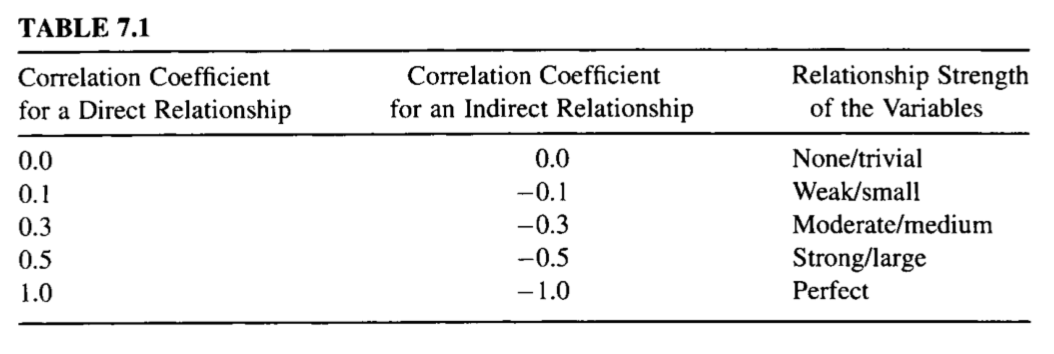

The correlation between two variables that each have a Gaussian distribution can be calculated using standard methods such as the Pearson’s correlation. This procedure cannot be used for data that does not have a Gaussian distribution. Instead, rank correlation methods must be used.

Rank correlation refers to methods that quantify the association between variables using the ordinal relationship between the values rather than the specific values. Ordinal data is data that has label values and has an order or rank relationship; for example: ‘low‘, ‘medium‘, and ‘high‘.

Rank correlation can be calculated for real-valued variables. This is done by first converting the values for each variable into rank data. This is where the values are ordered and assigned an integer rank value. Rank correlation coefficients can then be calculated in order to quantify the association between the two ranked variables.

Because no distribution for the values is assumed, rank correlation methods are referred to as distribution-free correlation or nonparametric correlation. Interestingly, rank correlation measures are often used as the basis for other statistical hypothesis tests, such as determining whether two samples were likely drawn from the same (or different) population distributions.

Rank correlation methods are often named after the researcher or researchers that developed the method. Four examples of rank correlation methods are as follows:

- Spearman’s Rank Correlation.
- Kendall’s Rank Correlation.
- Goodman and Kruskal’s Rank Correlation.
- Somers’ Rank Correlation.

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


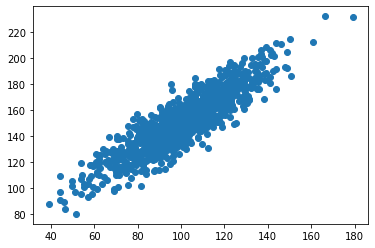

In [5]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

<h2>Covariance</h2>

Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

The calculation of the sample covariance is as follows:

cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

The use of the mean in the calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.

In [7]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov

# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
                 
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


The covariance between the two variables is 389.75. We can see that it is positive, suggesting the variables change in the same direction as we expect.



A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.

## 1.) Pearson’s Correlation Coefficient

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

Tests whether two samples have a linear relationship.

### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

### Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [1]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


In [8]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

## 2.) Spearman’s Rank Correlation

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.

A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.

Tests whether two samples have a monotonic relationship.

### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

### Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [2]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


In [9]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr

# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


In [1]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000


As with the Pearson’s correlation coefficient, the coefficient can be calculated pair-wise for each variable in a dataset to give a correlation matrix for review.

## 3.) Kendall’s Rank Correlation

Kendall’s rank correlation is named for Maurice Kendall.

It is also called Kendall’s correlation coefficient, and the coefficient is often referred to by the lowercase Greek letter tau (t). In turn, the test may be called Kendall’s tau.

The intuition for the test is that it calculates a normalized score for the number of matching or concordant rankings between the two samples. As such, the test is also referred to as Kendall’s concordance test.

Tests whether two samples have a monotonic relationship.

### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

### Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [3]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


In [2]:
# calculate the kendall's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# calculate kendall's correlation
coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.709
Samples are correlated (reject H0) p=0.000


## 4.) Chi-Squared Test

Tests whether two categorical variables are related or independent.

### Assumptions

- Observations used in the calculation of the contingency table are independent.
- 25 or more examples in each cell of the contingency table.

### Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [4]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency

table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent
